---   ---   ---   ---   ---   ---   ---
# WorldQuant University  
## (19/09) MScFE 640 Portfolio Theory and Asset Pricing (C18-S4)
## Group work Assignment  \ :: \  Timezone Group 2-D   \ :: \ Submission 3

Tea Toradze (tea_tor@yahoo.com)
---   ---   ---   ---   ---   ---   ---

In [0]:
# Upload excel file to temporary working environment
from google.colab import files
uploaded = files.upload()



Saving g GWP_PTAP_Data.xlsx to g GWP_PTAP_Data.xlsx


In [0]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
import datetime

sns.set()
plt.rcParams['figure.figsize'] = [13, 7]



In [0]:
# Loading SPDR data
spdr = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=2)
spdr.set_index('Date', inplace=True)
spdr



,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE,S&P 500
Date,,,,,,,,,,,
2016-12-30,75.320000,49.700001,62.220001,81.400002,51.709999,68.940002,23.250000,48.360001,48.570000,30.750000,2238.830078
2017-01-31,72.900002,51.959999,63.380001,84.830002,52.590000,70.519997,23.309999,50.080002,49.180000,30.709999,2278.870117
2017-02-28,71.379997,52.250000,65.860001,86.370003,55.099998,74.989998,24.540001,52.349998,51.770000,32.139999,2363.639893
2017-03-31,69.900002,52.410000,65.059998,87.949997,54.580002,74.360001,23.730000,53.310001,51.310001,31.600000,2362.719971
2017-04-28,67.839996,53.070000,66.339996,90.059998,55.180000,75.500000,23.530001,54.380001,51.700001,31.650000,2384.199951
2017-05-31,65.440002,53.080002,67.519997,91.050003,56.639999,76.080002,23.250000,56.529999,53.840000,31.860001,2411.800049
2017-06-30,64.919998,53.810001,68.110001,89.629997,54.939999,79.239998,24.670000,54.720001,51.959999,32.200001,2423.409912
2017-07-31,66.620003,54.639999,68.309998,91.360001,55.320000,79.889999,25.090000,57.160000,53.220001,32.590000,2470.300049
2017-08-31,62.970001,55.070000,68.459999,89.660004,54.709999,81.290001,24.700001,58.830002,54.970001,32.919998,2471.649902


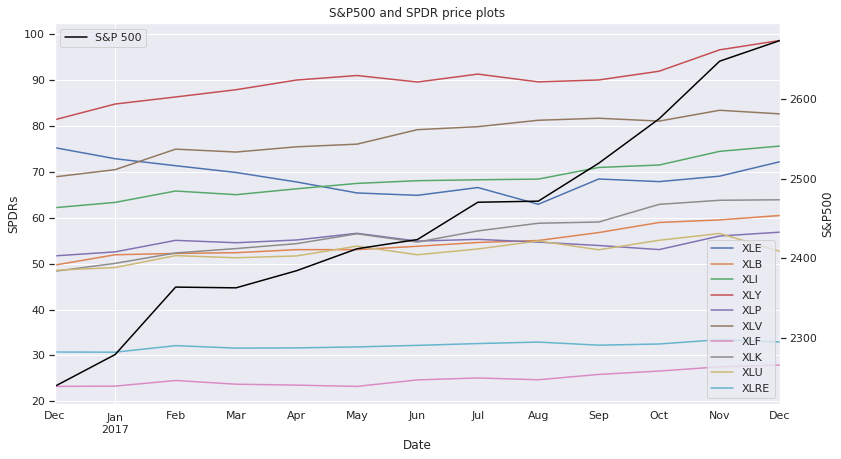

In [0]:
# Visualising SPDR funds on same plot
ax1 = spdr.drop(['S&P 500'], axis=1).plot()
ax2 = ax1.twinx()
spdr[['S&P 500']].plot(ax=ax2, color='black')
ax1.set_ylabel('SPDRs')
ax2.set_ylabel('S&P500')
ax2.grid(False)
plt.title('S&P500 and SPDR price plots')
plt.show()



---   ---   ---   ---   ---   ---   ---
**Task 3(a):** Compute the price return for each SPDR and the
S\&P500 for each month of 2017.


In [0]:
# Computing log returns
log_returns = np.log(spdr/spdr.shift(1))[1:]
log_returns



,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE,S&P 500
Date,,,,,,,,,,,
2017-01-31,-0.032657,0.044469,0.018472,0.041274,0.016875,0.022660,0.002577,0.034949,0.012481,-0.001302,0.017726
2017-02-28,-0.021071,0.005566,0.038383,0.017991,0.046624,0.061458,0.051422,0.044330,0.051324,0.045513,0.036523
2017-03-31,-0.020952,0.003058,-0.012221,0.018128,-0.009482,-0.008437,-0.033564,0.018172,-0.008925,-0.016944,-0.000389
2017-04-28,-0.029914,0.012514,0.019483,0.023708,0.010933,0.015214,-0.008464,0.019873,0.007572,0.001581,0.009050
2017-05-31,-0.036018,0.000188,0.017631,0.010933,0.026115,0.007653,-0.011971,0.038775,0.040559,0.006613,0.011510
2017-06-30,-0.007978,0.013659,0.008700,-0.015719,-0.030474,0.040696,0.059283,-0.032542,-0.035543,0.010615,0.004802
2017-07-31,0.025849,0.015307,0.002932,0.019118,0.006893,0.008169,0.016881,0.043625,0.023960,0.012039,0.019164
2017-08-31,-0.056346,0.007839,0.002193,-0.018783,-0.011088,0.017372,-0.015666,0.028798,0.032353,0.010075,0.000546
2017-09-29,0.083883,0.030931,0.036430,0.004673,-0.013433,0.005398,0.045894,0.004579,-0.035553,-0.020872,0.019119


---   ---   ---   ---   ---   ---   ---
**Task 3(b):** Compute the active return (relative to the
S\&P500) for each SPDR for each month of 2017.


In [0]:
# Computing active returns
active_returns = log_returns.drop(['S&P 500'], axis=1).apply(lambda x: x - log_returns['S&P 500'])
active_returns



,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE
Date,,,,,,,,,,
2017-01-31,-0.050383,0.026743,0.000746,0.023548,-0.000851,0.004933,-0.015149,0.017222,-0.005245,-0.019028
2017-02-28,-0.057594,-0.030957,0.001860,-0.018532,0.010101,0.024935,0.014899,0.007807,0.014801,0.008990
2017-03-31,-0.020563,0.003447,-0.011832,0.018517,-0.009093,-0.008047,-0.033175,0.018561,-0.008536,-0.016555
2017-04-28,-0.038964,0.003464,0.010433,0.014658,0.001883,0.006164,-0.017514,0.010822,-0.001478,-0.007469
2017-05-31,-0.047528,-0.011321,0.006121,-0.000577,0.014605,-0.003857,-0.023481,0.027265,0.029049,-0.004897
2017-06-30,-0.012780,0.008857,0.003898,-0.020521,-0.035276,0.035894,0.054481,-0.037344,-0.040345,0.005813
2017-07-31,0.006685,-0.003857,-0.016232,-0.000046,-0.012271,-0.010995,-0.002283,0.024461,0.004796,-0.007125
2017-08-31,-0.056893,0.007293,0.001647,-0.019329,-0.011634,0.016826,-0.016212,0.028251,0.031807,0.009529
2017-09-29,0.064764,0.011812,0.017311,-0.014446,-0.032552,-0.013721,0.026775,-0.014540,-0.054672,-0.039991


---   ---   ---   ---   ---   ---   ---
**Task 3(c):** Calculate the monthly tracking error for each
SPDR in 2017.


In [0]:
# Computing tracking errors
TEs = pd.DataFrame({'Tracking Errors': active_returns.std() })
TEs



,Tracking Errors
XLE,0.038073
XLB,0.015698
XLI,0.010696
XLY,0.016614
XLP,0.020562
XLV,0.018805
XLF,0.024231
XLK,0.022653
XLU,0.034331
XLRE,0.014815


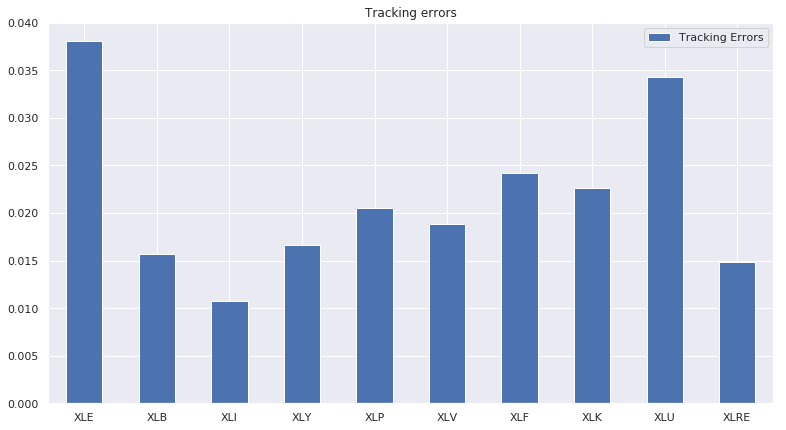

In [0]:
# Plotting tracking errors
TEs.plot.bar(rot=0, title='Tracking errors')
plt.show()



In [0]:
# Finding ETF with minimum tracking error
TEs.loc[TEs.idxmin()]



,Tracking Errors
XLI,0.010696


In [0]:
# Computing MATEs (Mean Adjusted Tracking Errors)
MATEs = pd.DataFrame({'MATE':np.sqrt((active_returns**2).sum()/active_returns.shape[0])})
MATEs



,MATE
XLE,0.040763
XLB,0.015119
XLI,0.010353
XLY,0.015957
XLP,0.020839
XLV,0.018008
XLF,0.023203
XLK,0.023294
XLU,0.033834
XLRE,0.016829


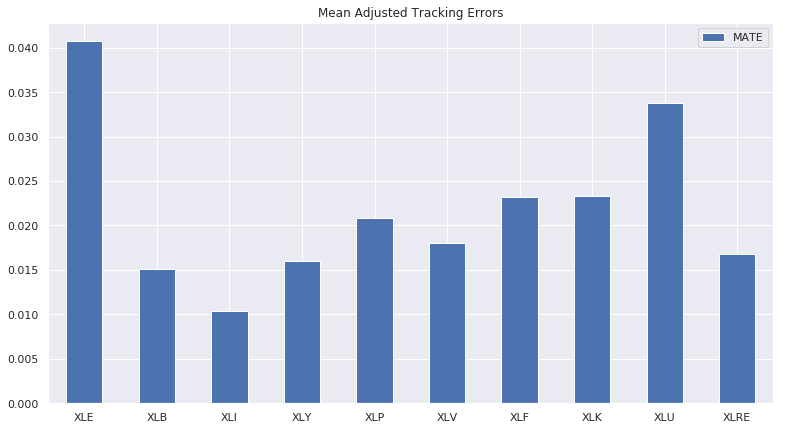

In [0]:
# Plotting MATEs
MATEs.plot.bar(rot=0, title='Mean Adjusted Tracking Errors')
plt.show()



In [0]:
# Finding ETF with minimum MATE
MATEs.loc[MATEs.idxmin()]



,MATE
XLI,0.010353
